## Задание

Давайте сначала загрузим все необходимые нам библиотеки

In [3]:
#your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)

# все, которые еще сочтете нужными

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [4]:
#your code here
data = pd.read_csv("data.adult.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

В данном датасете пропущенные значения обозначены как "?".

**Задание 1 (1 балл)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [5]:
# если сделаем просто поиск пропущенных, 
# их не будет, тк они обозначены "?"
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

In [6]:
# пропущенные значения заменяем на numpy.nan
data.replace("?", np.nan, inplace=True)
data.isnull().sum()

age                 0
workclass         929
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        933
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64

In [7]:
data_clean = data.dropna()
data_clean.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем:

 - Выделите целевую переменную в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату (название целевой переменной >50K,<=50K)
 - Обратите внимание, что не все признаки являются вещественными. В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [8]:
data_clean['>50K,<=50K']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4         >50K
         ...  
16275    <=50K
16276     >50K
16277    <=50K
16278    <=50K
16279     >50K
Name: >50K,<=50K, Length: 15347, dtype: object

In [9]:
#your code here
income = data_clean['>50K,<=50K']

data_clean.drop(columns = ['>50K,<=50K'])

income = income.map({'>50K': 1, '<=50K': 0})

num_data = data_clean.select_dtypes(include=['float64', 'int64'])

num_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 3 алгоритма:
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Для начала выберем один гиперпараметр, который будем оптимизировать:
 - (*max_depth*)

Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**Задание 2 (2 балла)** Для каждого из трех алгоритмов подберите оптимальные значения указанных гиперпараметров.

In [10]:
#your code here
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(num_data, income, test_size=0.2, random_state=42)

# Определение параметров для GridSearchCV
param_grid = {
    'max_depth': [None, 3, 5, 10, 15, 20]  # Возможные значения max_depth
}

# Определение схемы кросс-валидации
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Список моделей для подбора гиперпараметров
models = [
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42))
]

# Подбор гиперпараметров для каждой модели
for model_name, model in models:
    print(f"Подбор гиперпараметров для {model_name}:")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Вывод лучших параметров и лучшего результата
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучшее значение accuracy на кросс-валидации: {grid_search.best_score_:.4f}")
    
    # Оценка модели на тестовой выборке
    y_pred = grid_search.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")
    print("-" * 50)

Подбор гиперпараметров для DecisionTree:


Лучшие параметры: {'max_depth': 5}
Лучшее значение accuracy на кросс-валидации: 0.8224
Accuracy на тестовой выборке: 0.8189
--------------------------------------------------
Подбор гиперпараметров для RandomForest:
Лучшие параметры: {'max_depth': 10}
Лучшее значение accuracy на кросс-валидации: 0.8270
Accuracy на тестовой выборке: 0.8218
--------------------------------------------------
Подбор гиперпараметров для GradientBoosting:
Лучшие параметры: {'max_depth': 5}
Лучшее значение accuracy на кросс-валидации: 0.8357
Accuracy на тестовой выборке: 0.8332
--------------------------------------------------


Что вы можете сказать?

- Видим, что на глубине 5 и при градиентном бустинге достигаются самые лучшие показатели точности (0,83 с копейками). Значит, из трех вариантов останавливаемся на последнем и дальше обучаем именно эту модель. 

**Задание 3 (1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

**Что значит "качество стабилизируется"?**

Это означает, что при увеличении количества деревьев (n_estimators) метрика качества (например, точность или F1-score) перестает существенно расти. Например, если при n_estimators=100 точность составляет 0.90, а при n_estimators=200 — 0.91, а при n_estimators=500 — 0.911, то можно считать, что качество стабилизировалось при n_estimators=200.

*(Пример искусственный)*

n_estimators = 10, CV accuracy = 0.8199
n_estimators = 50, CV accuracy = 0.8233
n_estimators = 100, CV accuracy = 0.8245
n_estimators = 150, CV accuracy = 0.8254
n_estimators = 200, CV accuracy = 0.8257
n_estimators = 300, CV accuracy = 0.8269
n_estimators = 400, CV accuracy = 0.8263
n_estimators = 500, CV accuracy = 0.8260


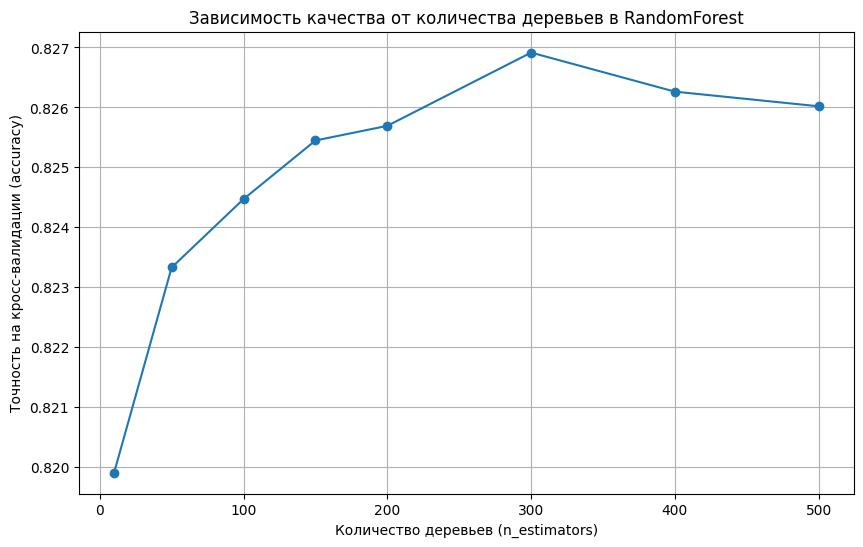

Качество стабилизируется при n_estimators = 150


In [12]:
#your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# Определение схемы кросс-валидации
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Обучение RandomForest с максимальным количеством деревьев
max_estimators = 500  # Максимальное количество деревьев
rf = RandomForestClassifier(n_estimators=max_estimators, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Список количеств деревьев для проверки
n_estimators_list = [10, 50, 100, 150, 200, 300, 400, 500]

# Оценка качества на кросс-валидации для разных подмножеств деревьев
cv_scores = []
for n_estimators in n_estimators_list:
    # Используем только первые n_estimators деревьев
    rf_subset = RandomForestClassifier(n_estimators=n_estimators, max_depth=15, random_state=42, n_jobs=-1)
    rf_subset.estimators_ = rf.estimators_[:n_estimators]
    
    # Оценка качества на кросс-валидации
    scores = cross_val_score(rf_subset, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_scores.append(scores.mean())
    print(f"n_estimators = {n_estimators}, CV accuracy = {scores.mean():.4f}")

# Визуализация зависимости качества от количества деревьев
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, cv_scores, marker='o')
plt.title('Зависимость качества от количества деревьев в RandomForest')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Точность на кросс-валидации (accuracy)')
plt.grid(True)
plt.show()

# Определение количества деревьев, при котором качество стабилизируется
for i in range(1, len(cv_scores)):
    if cv_scores[i] - cv_scores[i - 1] < 0.001:  # Порог для стабилизации
        print(f"Качество стабилизируется при n_estimators = {n_estimators_list[i]}")
        break

- Видим, что максимум качества (точности) достигается при числе деревьев, равном 300, а потом даже начинает падать. Впрочем, различия между 100 и 300 деревьями -- тысячные доли. 
- Ну а качество стабилизируется при 150 деревьях, так что нормально, на этом и остановимся. 

**Задание 4 (1 балл)** Подберём число деревьев (*n_estimators*) в алгоритме GradientBoosting. Мы знаем, что ошибка бустинга на тестовых данных, как правило, имеет U-образную форму, то есть сначала уменьшается, а при достижении некоторого числа деревьев начинает расти. Нарисуйте график ошибки в зависимости от числа деревьев. Подберите n_estimators, соответствующий минимуму ошибки.

n_estimators = 10, CV accuracy = 0.8122
n_estimators = 50, CV accuracy = 0.8325
n_estimators = 100, CV accuracy = 0.8357
n_estimators = 150, CV accuracy = 0.8346
n_estimators = 200, CV accuracy = 0.8329
n_estimators = 300, CV accuracy = 0.8294
n_estimators = 400, CV accuracy = 0.8267
n_estimators = 500, CV accuracy = 0.8237


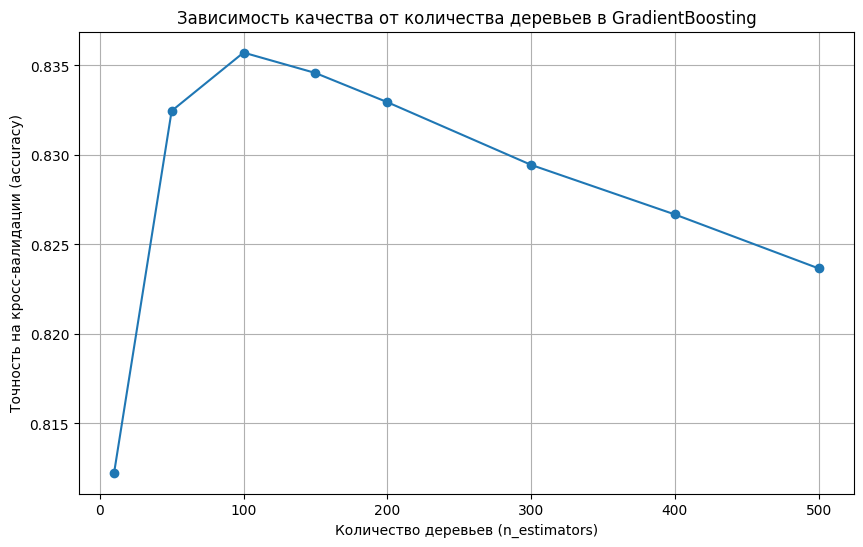

In [13]:
#your code here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold

# Определение схемы кросс-валидации
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Обучение GradientBoosting с максимальным количеством деревьев
max_estimators = 500  # Максимальное количество деревьев
gb = GradientBoostingClassifier(n_estimators=max_estimators, max_depth=5, random_state=42)
gb.fit(X_train, y_train)

# Список количеств деревьев для проверки
n_estimators_list = [10, 50, 100, 150, 200, 300, 400, 500]

# Оценка качества на кросс-валидации для разных подмножеств деревьев
cv_scores = []
for n_estimators in n_estimators_list:
    # Используем только первые n_estimators деревьев
    gb_subset = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=5, random_state=42)
    gb_subset.estimators_ = gb.estimators_[:n_estimators]
    
    # Оценка качества на кросс-валидации
    scores = cross_val_score(gb_subset, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_scores.append(scores.mean())
    print(f"n_estimators = {n_estimators}, CV accuracy = {scores.mean():.4f}")

# Визуализация зависимости качества от количества деревьев
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, cv_scores, marker='o')
plt.title('Зависимость качества от количества деревьев в GradientBoosting')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Точность на кросс-валидации (accuracy)')
plt.grid(True)
plt.show()

- Выше на графике видим, что точность начинает падать после 100 деревьев. 

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**Задание 5 (1 балл)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*. Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

- Масштабирование может улучшить работу алгоритмов, чувствительных к масштабу признаков. 
- НО масштабирование не повлияет на работу деревьев решений, так как они не зависят от масштаба признаков.

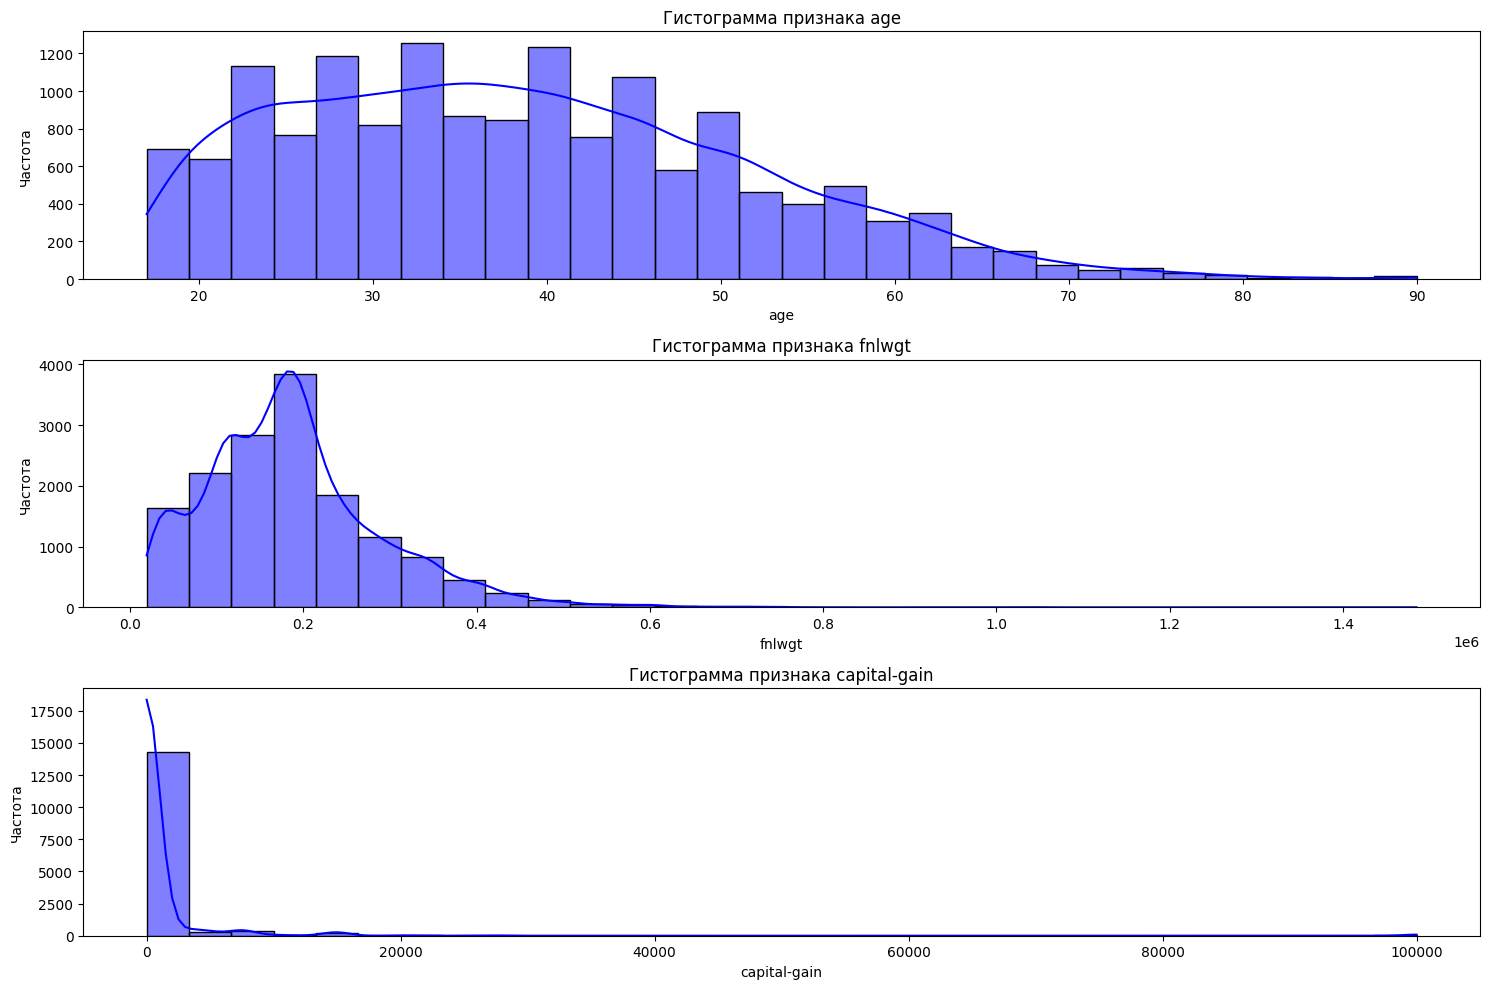

In [14]:
# Выбор признаков для анализа
features_to_plot = ['age', 'fnlwgt', 'capital-gain']

# Построение гистограмм
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 1, i)
    sns.histplot(num_data[feature], bins=30, kde=True, color='blue')
    plt.title(f'Гистограмма признака {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

**Задание 6 (2 балла)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

In [15]:
print("Признаки до масштабирования:")
print(pd.DataFrame(X_train, columns=X_train.columns).describe())

Признаки до масштабирования:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  12277.000000  1.227700e+04   12277.000000  12277.000000  12277.000000   
mean      38.471532  1.882798e+05      10.159892   1070.548587     88.793842   
std       13.050911  1.061218e+05       2.556229   7213.694486    405.096253   
min       17.000000  1.930200e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.157050e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.771470e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.358940e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   3770.000000   

       hours-per-week  
count    12277.000000  
mean        40.995439  
std         11.960610  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Проверка масштабированных данных
print("Признаки после масштабирования:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe())

# Определение параметров для GridSearchCV
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Параметр регуляризации
    'penalty': ['l2'],  # Используем только 'l2', так как 'lbfgs' поддерживает только 'l2'
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10, 20, 30]  # Количество соседей
}

param_grid_rf = {
    'max_depth': [None, 3, 5, 10, 15, 20],  # Максимальная глубина дерева
    'n_estimators': [50, 100, 150, 200, 300]  # Количество деревьев
}

param_grid_gb = {
    'max_depth': [3, 5, 10, 15],  # Максимальная глубина дерева
    'n_estimators': [50, 100, 150, 200, 300]  # Количество деревьев
}

# Определение схемы кросс-валидации
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Список моделей для подбора гиперпараметров
models = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs'), param_grid_logreg),
    ('KNN', KNeighborsClassifier(), param_grid_knn),
    ('Random Forest', RandomForestClassifier(random_state=42), param_grid_rf),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42), param_grid_gb)
]

# Подбор гиперпараметров для каждой модели
for model_name, model, param_grid in models:
    print(f"Подбор гиперпараметров для {model_name}:")
    
    # Если это Logistic Regression или KNN, используем масштабированные данные
    if model_name in ['Logistic Regression', 'KNN']:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
    else:
        # Для деревьев решений используем исходные данные
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
    
    # Вывод лучших параметров и лучшего результата
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучшее значение accuracy на кросс-валидации: {grid_search.best_score_:.4f}")
    
    # Оценка модели на тестовой выборке
    if model_name in ['Logistic Regression', 'KNN']:
        y_pred = grid_search.predict(X_test_scaled)
    else:
        y_pred = grid_search.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")
    print("-" * 50)

Признаки после масштабирования:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  1.227700e+04  1.227700e+04   1.227700e+04  1.227700e+04  1.227700e+04   
mean  -1.687083e-16 -8.594575e-17  -3.241052e-17  3.588307e-17 -5.585027e-17   
std    1.000041e+00  1.000041e+00   1.000041e+00  1.000041e+00  1.000041e+00   
min   -1.645280e+00 -1.592366e+00  -3.583508e+00 -1.484111e-01 -2.192009e-01   
25%   -8.023929e-01 -6.839103e-01  -4.537699e-01 -1.484111e-01 -2.192009e-01   
50%   -1.127578e-01 -1.049103e-01  -6.255269e-02 -1.484111e-01 -2.192009e-01   
75%    6.535035e-01  4.486934e-01   1.111099e+00 -1.484111e-01 -2.192009e-01   
max    3.948427e+00  1.221689e+01   2.284751e+00  1.371454e+01  9.087608e+00   

       hours-per-week  
count    1.227700e+04  
mean    -1.140156e-16  
std      1.000041e+00  
min     -3.344066e+00  
25%     -8.322980e-02  
50%     -8.322980e-02  
75%      3.348261e-01  
max      4.849830e+00  
Подбор гиперпараметров для Logi

Изменилось ли качество у некоторых алгоритмов?

- Да, качество у алгоритмов изменилось, но незначительно. По-прежнему наиболее высокая точность -- у модели с градиентным бустингом (0,83); тут качество даже чуточку выросло после масштабирования, но всего на чуть менее одной сотой доли.

**Задание 7 (3 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае:
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - GradientBoosting — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [ ]:
#your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Определение схемы кросс-валидации
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Определение параметров для GridSearchCV
param_grid_dt = {
    'max_depth': [None, 3, 5, 10, 15, 20],  # Глубина дерева
    'criterion': ['gini', 'entropy']  # Критерий разбиения
}

param_grid_rf = {
    'criterion': ['gini', 'entropy'],  # Критерий разбиения
    'max_features': ['sqrt', 'log2', None]  # Максимальное количество признаков
}

param_grid_gb = {
    'criterion': ['friedman_mse', 'squared_error'],  # Критерий разбиения
    'max_features': ['sqrt', 'log2', None]  # Максимальное количество признаков
}

# Список моделей для подбора гиперпараметров
models = [
    ('DecisionTree', DecisionTreeClassifier(random_state=42), param_grid_dt),
    ('RandomForest', RandomForestClassifier(n_estimators=200, random_state=42), param_grid_rf),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=100, random_state=42), param_grid_gb)
]

# Подбор гиперпараметров для каждой модели
for model_name, model, param_grid in models:
    print(f"Подбор гиперпараметров для {model_name}:")
    
    # GridSearchCV для подбора гиперпараметров
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Вывод лучших параметров и лучшего результата
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучшее значение accuracy на кросс-валидации: {grid_search.best_score_:.4f}")
    
    # Оценка модели на тестовой выборке
    y_pred = grid_search.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")
    print("-" * 50)

Подбор гиперпараметров для DecisionTree:
Лучшие параметры: {'criterion': 'gini', 'max_depth': 5}
Лучшее значение accuracy на кросс-валидации: 0.8224
Accuracy на тестовой выборке: 0.8189
--------------------------------------------------
Подбор гиперпараметров для RandomForest:
Лучшие параметры: {'criterion': 'entropy', 'max_features': None}
Лучшее значение accuracy на кросс-валидации: 0.8037
Accuracy на тестовой выборке: 0.8000
--------------------------------------------------
Подбор гиперпараметров для GradientBoosting:
Лучшие параметры: {'criterion': 'friedman_mse', 'max_features': None}
Лучшее значение accuracy на кросс-валидации: 0.8310
Accuracy на тестовой выборке: 0.8283
--------------------------------------------------


Какой из алгоритмов имеет наилучшее качество?

- Наилучшее качество -- все еще у алгоритма с градиентным бустингом. И лучшим параметром оказался MSE 'friedman_mse'.

**Задание 8 (1 балла)** Сравните алгоритмы с точки зрения времени обучения с помощью библиотеки [time](https://www.geeksforgeeks.org/python-time-module/) или [tqdm](https://pypi.org/project/tqdm/). Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

In [ ]:
#your code here
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Список моделей для сравнения
models = [
    ('Logistic Regression', LogisticRegression(C=1, penalty='l2', random_state=42, max_iter=1000)),
    ('KNN', KNeighborsClassifier(n_neighbors=30)),
    ('DecisionTree', DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=200, criterion='gini', max_features='sqrt', random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=100, criterion='friedman_mse', max_features='sqrt', random_state=42))
]

# Сравнение времени обучения
for model_name, model in models:
    print(f"Обучение модели: {model_name}")
    
    # Замер времени обучения
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Вывод времени обучения
    training_time = end_time - start_time
    print(f"Время обучения: {training_time:.4f} секунд")
    print("-" * 50)

Обучение модели: Logistic Regression
Время обучения: 0.3124 секунд
--------------------------------------------------
Обучение модели: KNN
Время обучения: 0.0119 секунд
--------------------------------------------------
Обучение модели: DecisionTree
Время обучения: 0.0420 секунд
--------------------------------------------------
Обучение модели: RandomForest
Время обучения: 2.8895 секунд
--------------------------------------------------
Обучение модели: GradientBoosting
Время обучения: 0.4951 секунд
--------------------------------------------------


- Дольше всего работает обучение RandomForest (целых 1.8 секунды!), потому что обучается куча деревьев. В нашем случае 200 штук. 
- Странно, правда, что случайный лес оказался дольше градиентного бустинга. А, ну хотя в бустинге у нас n=100, а в случайном лесе n=200. Тогда понятно.

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков.

**Задание 9 (1 балл)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [ ]:
# Выделение категориальных признаков
cat_data = data_clean.select_dtypes(include=['object']).columns

# Преобразование категориальных признаков с помощью one-hot-encoding
data_clean_encoded = pd.get_dummies(data_clean, columns=cat_data, drop_first=True)

# Проверка результата
print("Признаки после one-hot-encoding:")
print(data_clean_encoded.head())


Признаки после one-hot-encoding:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   34  284843              9           594             0              60   
1   40  190290             10             0             0              40   
2   36  177858             13             0             0              40   
3   22  184756             10             0             0              30   
4   47  149700             13         15024             0              40   

   workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                 True              False                   False   
1                False               True                   False   
2                 True              False                   False   
3                False               True                   False   
4                False               True                   False   

   workclass_Self-emp-not-inc  ...  relationship_Other-relative  \
0                     

In [ ]:
data_clean_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,">50K,<=50K_>50K"
0,34,284843,9,594,0,60,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,40,190290,10,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
2,36,177858,13,0,0,40,True,False,False,False,...,False,True,False,False,False,False,False,True,True,False
3,22,184756,10,0,0,30,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
4,47,149700,13,15024,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,True,True


**Задание 10 (1 балл)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [ ]:
# Объединение числовых и категориальных признаков
X = pd.concat([num_data, data_clean_encoded.drop(['>50K,<=50K_>50K'], axis=1)], axis=1)
y = income

# Проверка результата
print("Объединенные признаки:")
print(X.head())

Объединенные признаки:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   34  284843              9           594             0              60   
1   40  190290             10             0             0              40   
2   36  177858             13             0             0              40   
3   22  184756             10             0             0              30   
4   47  149700             13         15024             0              40   

   age  fnlwgt  education-num  capital-gain  ...  relationship_Not-in-family  \
0   34  284843              9           594  ...                        True   
1   40  190290             10             0  ...                        True   
2   36  177858             13             0  ...                       False   
3   22  184756             10             0  ...                       False   
4   47  149700             13         15024  ...                       False   

   relationship_Other-relative  r

In [ ]:
# Определение схемы кросс-валидации
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Список моделей с наилучшими гиперпараметрами
models = [
    ('Logistic Regression', LogisticRegression(C=1, penalty='l2', random_state=42, max_iter=1000)),
    ('KNN', KNeighborsClassifier(n_neighbors=30)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, criterion='gini', max_features='sqrt', random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, criterion='friedman_mse', max_features='sqrt', random_state=42))
]

# Обучение моделей и измерение качества
for model_name, model in models:
    print(f"Оценка модели: {model_name}")
    
    # Оценка качества с помощью 5-Fold CV
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print(f"Среднее значение accuracy на кросс-валидации: {cv_scores.mean():.4f}")
    
    # Оценка модели на тестовой выборке
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")
    print("-" * 50)

Оценка модели: Logistic Regression


/Users/maria/Desktop/Python/PythonDataAnalysis/venv_name/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maria/Desktop/Python/PythonDataAnalysis/venv_name/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

Среднее значение accuracy на кросс-валидации: 0.8387
Accuracy на тестовой выборке: 0.8085
--------------------------------------------------
Оценка модели: KNN
Среднее значение accuracy на кросс-валидации: 0.7784
Accuracy на тестовой выборке: 0.7801
--------------------------------------------------
Оценка модели: Random Forest
Среднее значение accuracy на кросс-валидации: 0.8497
Accuracy на тестовой выборке: 0.7961
--------------------------------------------------
Оценка модели: Gradient Boosting
Среднее значение accuracy на кросс-валидации: 0.8577
Accuracy на тестовой выборке: 0.8248
--------------------------------------------------


Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

- Модель с градиентным бустингом теперь немного переобучилась и показывает на тестовой выборке результат похуже, чем на кросс-валидации. Но в сравнении с прочими моделями она все еще самая лучшая (на кросс-валидации значение аж 0,86).